In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/MARUTI.csv')

In [4]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4426 non-null   float64
 14  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 518.9

In [22]:
dataset_copy = dataset.copy()
dataset_copy.set_index('Date', drop=True, inplace=True)
dataset_copy.drop(columns=['Prev Close','Symbol', 'Series', 'Last', 'Close','Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace=True)
dataset_copy.head()


,Open,High,Low,VWAP,Volume
Date,,,,,
2003-07-09,164.90,170.40,155.00,165.95,35164283
2003-07-10,167.00,168.70,164.50,166.74,10464179
2003-07-11,167.75,174.85,166.25,172.45,11740117
2003-07-14,174.25,179.25,174.25,177.91,5982324
2003-07-15,200.00,200.00,173.00,176.88,6173689


In [ ]:
# VWAP = volume weighted average price (financial matrix)
# Measures the average price of a asset during trading session, adjusted for the total transaction volume
# Calculate using the opening price for each day, adjusted in real time until the close of the session.
# VWAP = (Cumulative typical price x volume)/cumulative volume.


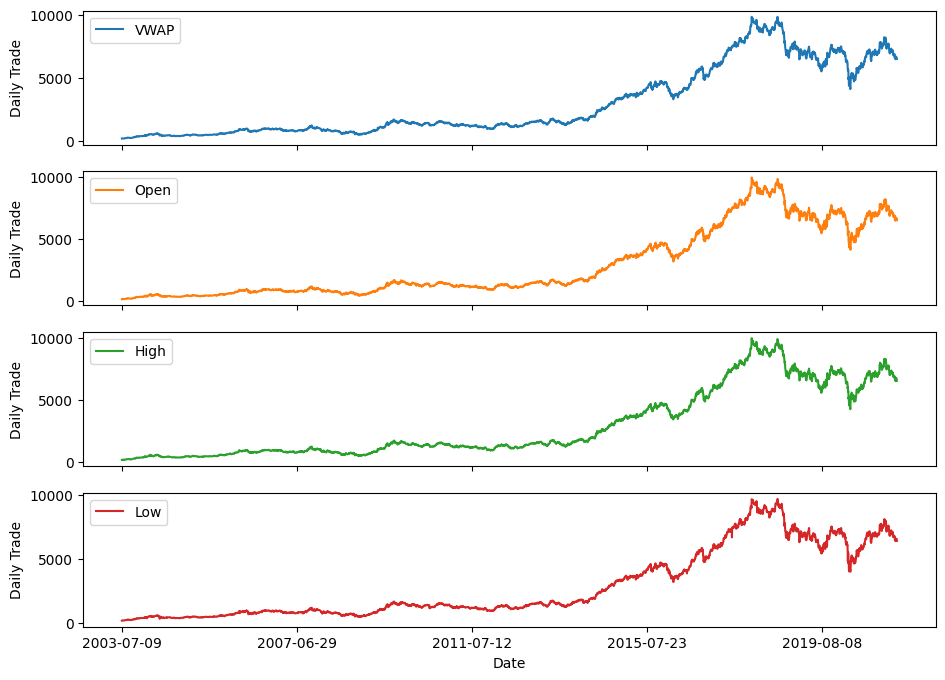

In [23]:
cols_plot = ['VWAP','Open', 'High', 'Low']
axes = dataset_copy[cols_plot].plot(figsize=(11,8), subplots=True)
for ax in axes :
  ax.set_ylabel('Daily Trade')


In [24]:
dataset_copy.dropna(inplace=True)

In [25]:
dataset_copy.head()

,Open,High,Low,VWAP,Volume
Date,,,,,
2003-07-09,164.90,170.40,155.00,165.95,35164283
2003-07-10,167.00,168.70,164.50,166.74,10464179
2003-07-11,167.75,174.85,166.25,172.45,11740117
2003-07-14,174.25,179.25,174.25,177.91,5982324
2003-07-15,200.00,200.00,173.00,176.88,6173689


In [26]:
X = dataset_copy.drop(columns='VWAP').values
Y = dataset_copy['VWAP'].values

In [27]:
print(X)

[[1.6490000e+02 1.7040000e+02 1.5500000e+02 3.5164283e+07]
 [1.6700000e+02 1.6870000e+02 1.6450000e+02 1.0464179e+07]
 [1.6775000e+02 1.7485000e+02 1.6625000e+02 1.1740117e+07]
 ...
 [6.5687500e+03 6.6500000e+03 6.5450000e+03 1.4062700e+06]
 [6.6350000e+03 6.6474500e+03 6.5520000e+03 7.5707500e+05]
 [6.5371000e+03 6.5596000e+03 6.4210000e+03 8.4999700e+05]]


In [28]:
print(X.shape)
print(Y.shape)

(4427, 4)
(4427,)


In [29]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [30]:
X_robust_scaler = RobustScaler()
Y_robust_scaler = RobustScaler()

X = X_robust_scaler.fit_transform(X)
Y = Y_robust_scaler.fit_transform(Y.reshape(-1,1))

In [31]:
X_minmax_scaler = MinMaxScaler()
Y_minmax_scaler = MinMaxScaler()

X = X_minmax_scaler.fit_transform(X)
Y = Y_minmax_scaler.fit_transform(Y)

In [32]:
print(X[:5])


[[9.18179963e-05 1.72980453e-04 0.00000000e+00 1.00000000e+00]
 [3.06059988e-04 0.00000000e+00 9.92685475e-04 2.97124109e-01]
 [3.82574985e-04 6.25782228e-04 1.17554859e-03 3.33432703e-01]
 [1.04570496e-03 1.07349634e-03 2.01149425e-03 1.69586677e-01]
 [3.67271985e-03 3.18487540e-03 1.88087774e-03 1.75032235e-01]]


In [37]:
X_window = []
Y_window = []

for i in range(5, len(X)):
  X_window.append(X[i-5:i])
  Y_window.append(Y[i])


In [38]:
X = np.array(X_window)
Y = np.array(Y_window)

print(X.shape)
print(Y.shape)

(4422, 5, 4)
(4422, 1)


In [39]:
np.save('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/X.npy', X)
np.save('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/Y.npy',Y)